In [50]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
pd.set_option('display.max_columns', None)

In [2]:
wnba=pd.read_csv('/Users/saurabh/Documents/MLsets/wnba.csv')

In [9]:
freq_distro_pos=wnba.Pos.value_counts()  #frequency of positions
freq_distro_height=wnba.Height.value_counts().sort_index()  #frequency of heights
print(freq_distro_pos,freq_distro_height)

G      60
F      33
C      25
G/F    13
F/C    12
Name: Pos, dtype: int64 165     1
168     2
170     6
173    11
175    16
178     8
180     7
183    11
185    15
188    20
191    11
193    18
196     9
198     5
201     2
206     1
Name: Height, dtype: int64


In [10]:
def make_pts_ordinal(row):
    if row['PTS'] <= 20:
        return 'very few points'
    if (20 < row['PTS'] <=  80):
        return 'few points'
    if (80 < row['PTS'] <=  150):
        return 'many, but below average'
    if (150 < row['PTS'] <= 300):
        return 'average number of points'
    if (300 < row['PTS'] <=  450):
        return 'more than average'
    else:
        return 'much more than average'
    
wnba['PTS_ordinal_scale'] = wnba.apply(make_pts_ordinal, axis = 1)

In [12]:
 wnba['PTS_ordinal_scale'].value_counts().iloc[[4, 3, 0, 2, 1, 5]]

much more than average      13
more than average           21
average number of points    45
many, but below average     25
few points                  27
very few points             12
Name: PTS_ordinal_scale, dtype: int64

In [14]:
wnba['Pos'].value_counts(normalize = True) * 100

G      41.958042
F      23.076923
C      17.482517
G/F     9.090909
F/C     8.391608
Name: Pos, dtype: float64

What proportion of players are 25 years old? 
What percentage of players are 30 years or older? 

In [19]:
percentages = wnba['Age'].value_counts(normalize = True).sort_index() * 100
proportion_25 = percentages[25] / 100
percentage_30 = percentages[30]
percentage_over_30 = percentages.loc[30:].sum()
percentage_below_23 = percentages.loc[:23].sum()
percentage_below_23

18.88111888111888

In [17]:
from scipy.stats import percentileofscore

In [18]:
percentileofscore(a = wnba['Age'], score = 23, kind = 'weak')

18.88111888111888

what percentage of players are 30 years or older.First we need to find the percentage of values equal to or less than 29 years (the percentile rank of 29)

In [20]:
100 - percentileofscore(wnba['Age'], 29, kind = 'weak')

26.573426573426573

What percentage of players played half the number of games or less in the 2016-2017 season (there are 34 games in the WNBA’s regular season)?
What percentage of players played more than half the number of games of the season 2016-2017?

In [23]:
percentile_rank_half_less = percentileofscore(wnba['Games Played'], 17, kind = 'weak')
percentage_half_more = 100 - percentile_rank_half_less
print(percentile_rank_half_less,percentage_half_more)

16.083916083916083 83.91608391608392


In [24]:
wnba['Age'].describe().iloc[3:]

min    21.0
25%    24.0
50%    27.0
75%    30.0
max    36.0
Name: Age, dtype: float64

75% of the players are below or at age 30

In [27]:
wnba['Age'].describe(percentiles = [.1, .15, .33, .5, .592, .85, .9]).iloc[3:]

min      21.0
10%      23.0
15%      23.0
33%      25.0
50%      27.0
59.2%    28.0
85%      31.0
90%      32.0
max      36.0
Name: Age, dtype: float64

In [30]:
wnba['Weight'].value_counts(bins = 10,normalize=True).sort_index(ascending=False)*100 #grouped frequency table

(107.2, 113.0]     2.097902
(101.4, 107.2]     1.398601
(95.6, 101.4]      2.097902
(89.8, 95.6]       6.993007
(84.0, 89.8]      16.783217
(78.2, 84.0]      21.678322
(72.4, 78.2]      23.076923
(66.6, 72.4]       6.993007
(60.8, 66.6]      14.685315
(54.941, 60.8]     3.496503
Name: Weight, dtype: float64

Most players weigh somewhere between 70 and 90 kg.
Very few players weigh over 100 kg.
Very few players weigh under 60 kg.

In [32]:
intervals = pd.interval_range(start = 0, end = 600, freq = 60)
gr_freq_table_10 = pd.Series([0 for _ in range(10)], index = intervals)

for value in wnba['PTS']:
    for interval in intervals:
        if value in interval:
            gr_freq_table_10.loc[interval] += 1
            break
            
gr_freq_table_10

(0, 60]       30
(60, 120]     25
(120, 180]    17
(180, 240]    22
(240, 300]    15
(300, 360]     7
(360, 420]    11
(420, 480]     7
(480, 540]     4
(540, 600]     5
dtype: int64

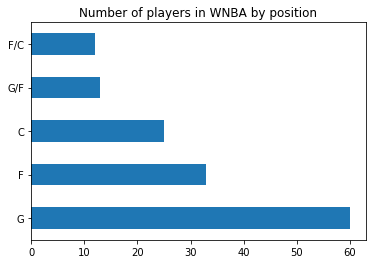

In [37]:
wnba['Pos'].value_counts().plot.barh(title = 'Number of players in WNBA by position')

Text(0, 0.5, '')

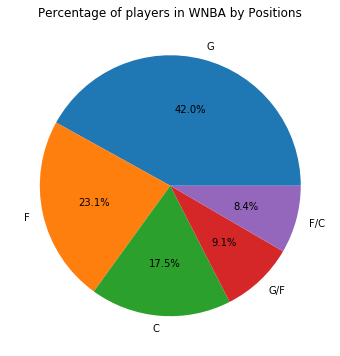

In [43]:
wnba['Pos'].value_counts().plot.pie(figsize = (6,6), autopct = '%.1f%%',title = 'Percentage of players in WNBA by Positions')
plt.ylabel('')

In [44]:
wnba['PTS'].describe()

count    143.000000
mean     201.790210
std      153.381548
min        2.000000
25%       75.000000
50%      177.000000
75%      277.500000
max      584.000000
Name: PTS, dtype: float64

We can see that 75% of the values are distributed within a relatively narrow interval (between 2 and 277), while the remaining 25% are distributed in an interval that's slightly larger.

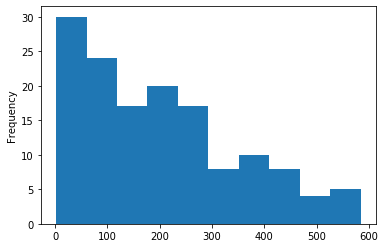

In [45]:
wnba['PTS'].plot.hist()

In [46]:
wnba['MIN'].mean()

496.97202797202794

On average, a WNBA player played approximately 497 minutes in the 2016-2017 season.
Let's hypothesize that older players generally play less than this average of 497 minutes, while younger players generally play more.

In [47]:
wnba['Age'].mean()

27.076923076923077

In [48]:
wnba['age_mean_relative'] = wnba['Age'].apply(lambda x: 'old' if x >= 27 else 'young')
wnba['min_mean_relative'] = wnba['MIN'].apply(lambda x: 'average or above' if x >= 497 else
                                           'below average')

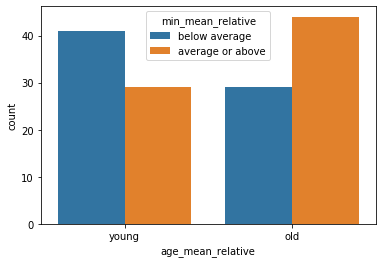

In [53]:
sns.countplot(x = 'age_mean_relative', hue = 'min_mean_relative', data = wnba)


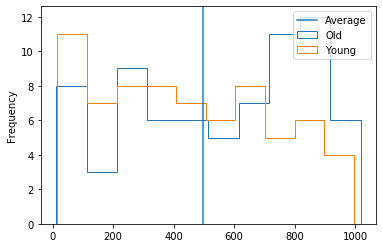

In [57]:
wnba[wnba.Age >= 27]['MIN'].plot.hist(label = 'Old',histtype = 'step', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.hist(label = 'Young',histtype = 'step', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()


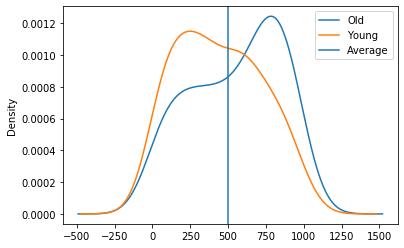

In [59]:
wnba[wnba.Age >= 27]['MIN'].plot.kde(label = 'Old', legend = True)
wnba[wnba.Age < 27]['MIN'].plot.kde(label = 'Young', legend = True)
plt.axvline(497, label = 'Average')
plt.legend()


Let's say we're interested in analyzing the distribution of player height as a function of player position. In other words, we want to figure out, for instance, whether centers are generally taller than forwards, whether forwards are generally shorter than guards, and so on.

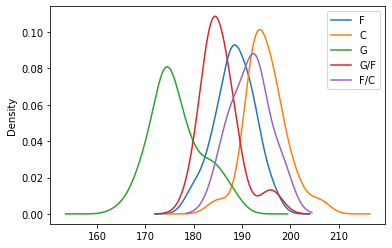

In [61]:
wnba[wnba.Pos == 'F']['Height'].plot.kde(label = 'F', legend = True)
wnba[wnba.Pos == 'C']['Height'].plot.kde(label = 'C', legend = True)
wnba[wnba.Pos == 'G']['Height'].plot.kde(label = 'G', legend = True)
wnba[wnba.Pos == 'G/F']['Height'].plot.kde(label = 'G/F', legend = True)
wnba[wnba.Pos == 'F/C']['Height'].plot.kde(label = 'F/C', legend = True)

If we look very closely, we can see a couple of clear patterns: the shortest players are generally guards, the tallest players are generally centers, mid-height players are generally forwards or play in a combined position, etc.

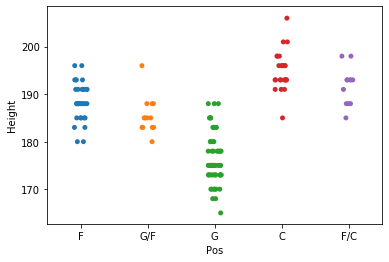

In [62]:
sns.stripplot(x = 'Pos', y = 'Height', data = wnba)

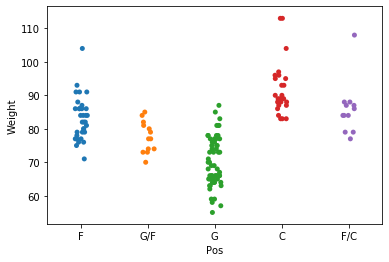

In [63]:
sns.stripplot(x = 'Pos', y = 'Weight', data = wnba, jitter = True)


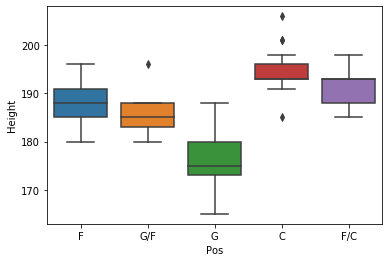

In [64]:
sns.boxplot(x = 'Pos', y = 'Height', data = wnba)

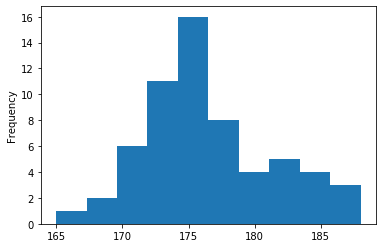

In [66]:
wnba[wnba.Pos == 'G']['Height'].plot.hist()

In [68]:
wnba[wnba.Pos == 'G']['Height'].describe()

count     60.000000
mean     176.450000
std        5.312043
min      165.000000
25%      173.000000
50%      175.000000
75%      180.000000
max      188.000000
Name: Height, dtype: float64

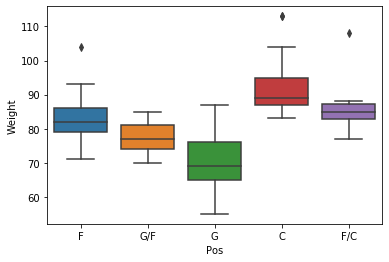

In [69]:
sns.boxplot(x = 'Pos', y = 'Weight', data = wnba)

In [70]:
wnba['Games Played'].describe()

count    143.000000
mean      24.356643
std        7.104259
min        2.000000
25%       22.000000
50%       27.000000
75%       29.000000
max       32.000000
Name: Games Played, dtype: float64

In [71]:
iqr=29-22
lower_bound=22-1.5*iqr
upper_bound=29+1.5*iqr

In [74]:
outliers_low = sum(wnba['Games Played'] < lower_bound) # True values will count as 1 in the summation
outliers_high = sum(wnba['Games Played'] > upper_bound)
print(outliers_low,outliers_high)

12 0


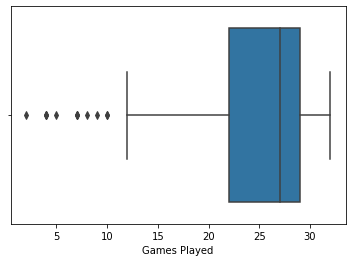

In [73]:
sns.boxplot(wnba['Games Played'])